# Loading and Tidying Data

***

## Missing data

In [17]:
import pandas as pd

data = pd.read_csv("../yearly_co2_emissions_1000_tonnes.csv")

#### Question
How many values are missing in `data`?

In [18]:
print(data.isnull().values.sum())

33772


***

## Tidying up!

#### Exercise
Look at the CO<sub>2</sub> data. What are the variables in this dataset?

country, year and CO2_output (kt)

In [19]:
df = data.melt(id_vars=['country'], var_name='year', value_name='kt')
df = df.dropna()
df['year'] = df['year'].astype(int)
co2 = df


How much CO<sub>2</sub> was emitted globally  before 1900?

In [20]:
print(co2.query('year < 1900')['kt'].sum())

42898103.1421


Plot the annual CO2 emissions of a country of your choice.

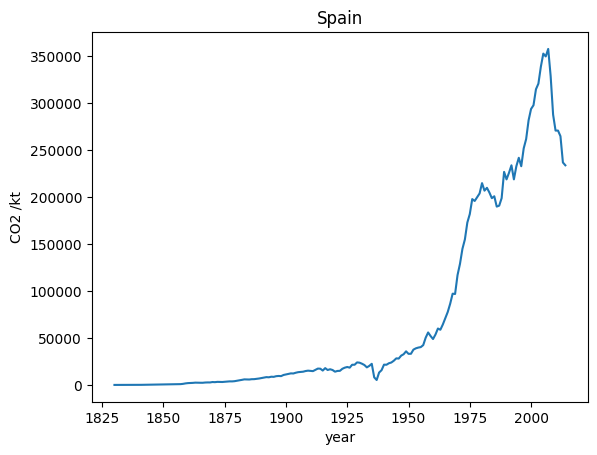

In [21]:
df = co2.query('country == "Spain"')
import matplotlib.pyplot as plt
plt.plot(df.year, df.kt)
plt.xlabel('year')
plt.ylabel('CO2 /kt')
plt.title('Spain')
plt.show()

***

## Missing headers


In [22]:
data = pd.read_csv("../stats_1997.csv", header=None)

#### Question

What are the variables in this data set and what are the observations?

geo (country), pop (population) and gdp.

In [23]:
df = data[0].str.split('-', expand=True)
df.columns = ['geo','statistic']
df['value'] = data[1]
df2 = df.pivot(index='geo',columns='statistic',values='value')
stats97 = df2

#### Exercise

Visualise the distribution of **pop**.

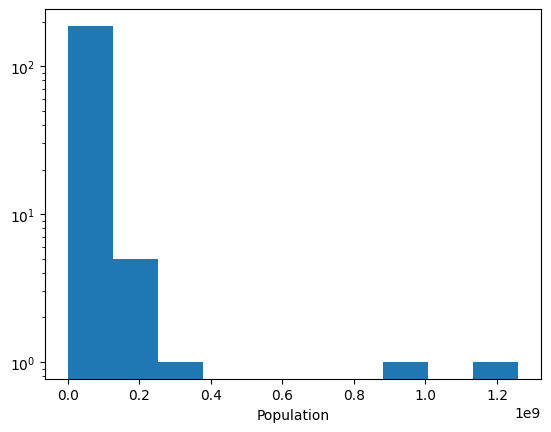

In [24]:
plt.hist(stats97['pop'])
plt.yscale('log')  # the log scale helps show more detail here
plt.xlabel('Population')
plt.show()

In 1997, how many countries had a population less than 100,000?

In [25]:
stats97.query('pop < 100000').shape[0]

15

Make a scatter plot showing GDP vs population.

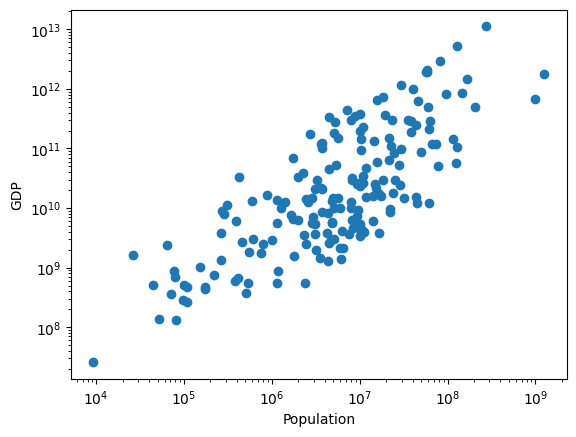

In [26]:
plt.scatter(stats97['pop'],stats97['gdp'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Population')
plt.ylabel('GDP')
plt.show()

It is often more relevant to compare countries' GDP on a per-capita basis. 
Add GDP per person (**gdp_pp**) as a new column of `stats97`.

In [27]:
stats97['gdp_pp'] = stats97['gdp']/stats97['pop']

Visualise the distribution of **gdp_pp**.

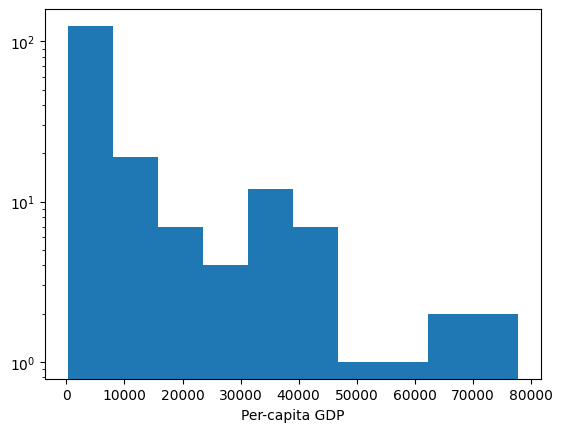

In [28]:
plt.hist(stats97['gdp_pp'].dropna()) # remove missing data
plt.yscale('log')  
plt.xlabel('Per-capita GDP')
plt.show()

***